# Creating network from data

In [19]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
matplotlib.rcParams.update({'font.size': 18})
import numpy as np
from collections import Counter
from operator import itemgetter
import random

## 1.Upload data as pandas

In [2]:
df = pd.read_csv ('2016_complete.csv',sep=';')
df
df[0:10]

,PASSENGERS,FREIGHT,MAIL,AIRLINE_ID,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_CITY_NAME,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,0.0,0.0,0.0,20402,2,2,10529,"Hartford, CT",14492,"Raleigh/Durham, NC",1,1,2,L
1,0.0,0.0,0.0,20402,2,2,10529,"Hartford, CT",15304,"Tampa, FL",1,1,3,L
2,0.0,0.0,0.0,20402,2,2,10559,"Seattle, WA",11637,"Fargo, ND",1,1,3,L
3,0.0,0.0,0.0,20402,2,2,10615,"El Paso, TX",11540,"El Paso, TX",1,1,1,L
4,0.0,0.0,0.0,20402,2,2,10615,"El Paso, TX",14107,"Phoenix, AZ",1,1,1,L
5,0.0,0.0,0.0,20402,2,2,10693,"Nashville, TN",14492,"Raleigh/Durham, NC",1,1,1,L
6,0.0,0.0,0.0,20402,2,2,10792,"Buffalo, NY",14711,"State College, PA",1,1,1,L
7,0.0,0.0,0.0,20402,2,2,10821,"Baltimore, MD",13342,"Milwaukee, WI",1,1,2,L
8,0.0,0.0,0.0,20402,2,2,11003,"Cedar Rapids/Iowa City, IA",12954,"Long Beach, CA",1,1,4,L
9,0.0,0.0,0.0,20402,2,2,11003,"Cedar Rapids/Iowa City, IA",13667,"Norfolk, VA",1,1,2,L


## 2.1 Summing  passengers, freight and mail annually and adding different classes togehter.
Original data is given monthly and separated in different classes according airflight service type. Since we are not looking into classes, we remove them. Here we still have amounts for each airline for routes separately. 

In [3]:
df1= df.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','AIRLINE_ID']).agg({'PASSENGERS': 'sum','FREIGHT': 'sum', 'MAIL': 'sum'}).reset_index()
df1[0:10]

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,AIRLINE_ID,PASSENGERS,FREIGHT,MAIL
0,10005,11630,20408,122.0,31299.0,0.0
1,10006,10170,20443,8.0,0.0,0.0
2,10011,10011,20424,9999.0,0.0,0.0
3,10011,10661,20424,24757.0,0.0,0.0
4,10011,11399,20424,4.0,0.0,0.0
5,10011,11869,20424,45.0,0.0,0.0
6,10011,12745,20424,0.0,0.0,0.0
7,10011,14081,20424,0.0,0.0,0.0
8,10015,10170,20443,18.0,0.0,0.0
9,10016,12184,20319,7.0,0.0,0.0


## 2.2 Summing  passengers, freight and mail annually per route
The amount of passengers, freights and mails are counted per routes annualy. So it is not anymore possible to identify the airlines.

In [4]:
df2= df.groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID']).agg({'PASSENGERS': 'sum','FREIGHT': 'sum', 'MAIL': 'sum'}).reset_index()
df2[0:10]

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,PASSENGERS,FREIGHT,MAIL
0,10005,11630,122.0,31299.0,0.0
1,10006,10170,8.0,0.0,0.0
2,10011,10011,9999.0,0.0,0.0
3,10011,10661,24757.0,0.0,0.0
4,10011,11399,4.0,0.0,0.0
5,10011,11869,45.0,0.0,0.0
6,10011,12745,0.0,0.0,0.0
7,10011,14081,0.0,0.0,0.0
8,10015,10170,18.0,0.0,0.0
9,10016,12184,7.0,0.0,0.0


## 3.1 Creating directed multigrapgh from 2.1 edges

In [5]:
G1 = nx.from_pandas_edgelist(df1, 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',create_using=nx.MultiDiGraph())
print(nx.info(G1))

Name: 
Type: MultiDiGraph
Number of nodes: 1236
Number of edges: 49272
Average in degree:  39.8641
Average out degree:  39.8641


## 3.2 Creating directed graph from 2.2 edges

In [44]:
G2 = nx.from_pandas_edgelist(df2, 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',create_using=nx.DiGraph())
print(nx.info(G2))

Name: 
Type: DiGraph
Number of nodes: 1236
Number of edges: 24391
Average in degree:  19.7338
Average out degree:  19.7338


## 3.3 Creating directed graph with number of passengers as weight

In [ ]:
G3 = nx.from_pandas_edgelist(df2, 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',['PASSENGERS'],create_using=nx.DiGraph())
print(nx.info(G3))


Name: 
Type: DiGraph
Number of nodes: 1236
Number of edges: 24391
Average in degree:  19.7338
Average out degree:  19.7338


## 3.4 Creating directed graph with number of FREIGHT as weight

In [ ]:
G4 = nx.from_pandas_edgelist(df2, 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',weight=['FREIGHT'],create_using=nx.DiGraph())
print(nx.info(G4))

# US air traffic (2016) - Exercise 2
Made on DiGraph G2

## Necessary functions:

In [11]:
# An easy way to plot the content of the counters
#I create this function because I will plot a lot of probability distribution functions in this notebook
def plot_counter(counter,xlabel = '',ylabel = '',prob = True,**params):
    lists = sorted(counter.items(), key = itemgetter(1)) # sorted by value
    x, y = zip(*lists) # unpack the list of keys, counts
    p_y = y / np.sum(y) #probability of y
    
    if prob:
        y = p_y
    
    plt.clf()
    plt.subplot(121)
    plt.title('Linear Scale')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if params.get('has_xlim',False):
        plt.xlim(params['left'],params['right'])
    plt.plot(x, y, "ro")

    plt.subplot(122)
    plt.title('Logarithmic Scale')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if params.get('has_xlim',False):
        plt.xlim(params['left'],params['right'])
    plt.loglog(x, y, "ro")
    
    if params.get('has_legend',False):
        legend_text = xlabel + ' =' + params['xmeaning'] + '\n' + ylabel + ' =' + params['ymeaning']
        plt.annotate(legend_text, xy=(250, -50), xycoords='axes points',
            size=14, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w'))
    
    plt.show()

In [12]:
def get_largest_strong_component(DiGraph):
    components_sorted = sorted( nx.strongly_connected_components(DiGraph) , key=len, reverse=True )
    return DiGraph.subgraph( components_sorted[0])

In [13]:
def get_sampled_shortest_path_lens(Graph , number_of_paths = 10000):
    
    path_lens = []
    
    for i in range(number_of_paths):
        
        #if i % 100 == 0:
        #   print(i)
        
        nodes = random.sample(Graph.nodes(),2) # RS: explain that with this you avoid taking the shortest path between a node and itself
        shortest_path = nx.shortest_path(Graph, source=nodes[0], target=nodes[1])
        path_lens.append(len(shortest_path))
    
    return path_lens

In [14]:
def hist_counter(counter,xlabel = '',ylabel = '',prob = True,**params):
    lists = sorted(counter.items(), key = itemgetter(1)) # sorted by value
    x, y = zip(*lists) # unpack the list of keys, counts
    p_y = y / np.sum(y) #probability of y
    
    if prob:
        y = p_y

    plt.clf()
    plt.subplot(121)
    plt.title('Shortest path distribution')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if params.get('has_xlim',False):
        plt.xlim(params['left'],params['right'])
        
    plt.bar(x ,y)
    
    if params.get('has_legend',False):
        legend_text = xlabel + ' =' + params['xmeaning'] + '\n' + ylabel + ' =' + params['ymeaning']
        plt.annotate(legend_text, xy=(250, -50), xycoords='axes points',
            size=14, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w'))

    plt.show()

## Degrees, in- and out-degree distributions

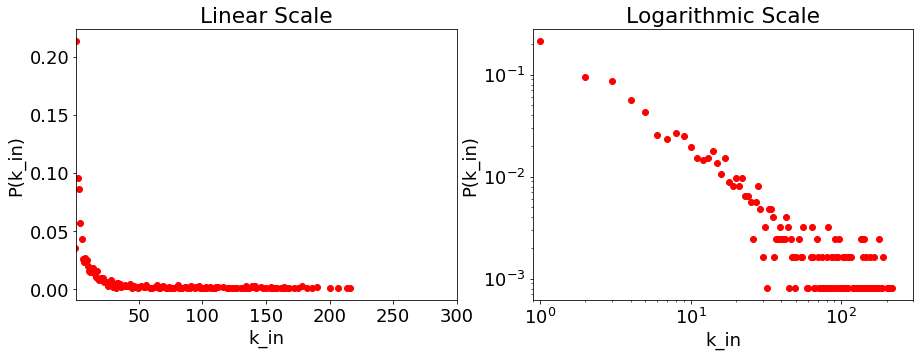

Largest in degree of any node in the network: 216


In [27]:
in_degree_count = Counter(dict(G2.in_degree).values())

plot_counter(in_degree_count,xlabel =  'k_in',ylabel ='P(k_in)',
            has_xlim = True, left = 0.9, right = 300)

print("Largest in degree of any node in the network: {}"
      .format(max(in_degree_count.keys())))

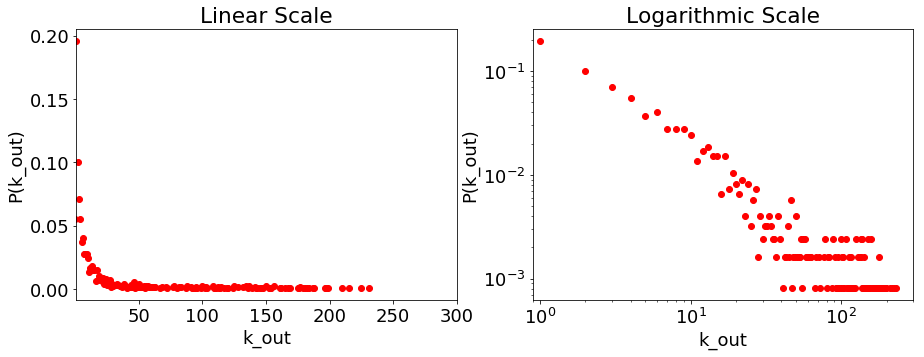

Largest out degree of any node in the network: 231


In [28]:
out_degree_count = Counter(dict(G2.out_degree).values())

plot_counter(out_degree_count,xlabel =  'k_out',ylabel ='P(k_out)',
            has_xlim = True, left = 0.9, right = 300)
print("Largest out degree of any node in the network: {}"
      .format(max(out_degree_count.keys())))

## Strongly and weakly connected components

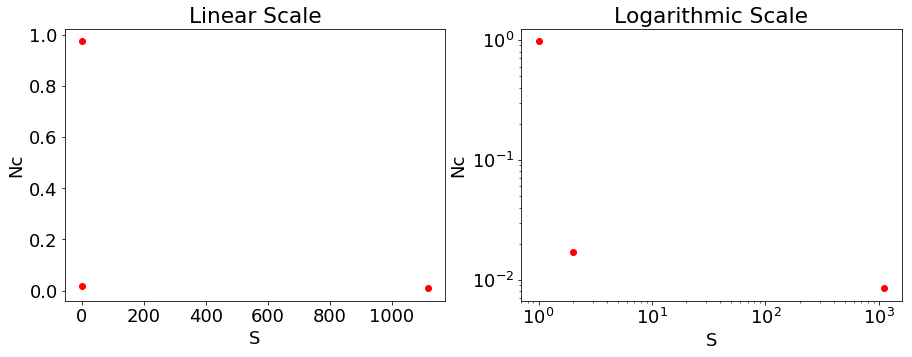

The largest strongly connected component in the network includes 1117 nodes


In [31]:
strong_component_lens = [len(c) for c in nx.strongly_connected_components(G2)]
strong_component_size_count = Counter(strong_component_lens)
plot_counter(strong_component_size_count,xlabel = 'S', ylabel = 'Nc')
print("The largest strongly connected component in the network includes {} nodes".format(max(strong_component_size_count.keys())))

!!!!!!Add comment

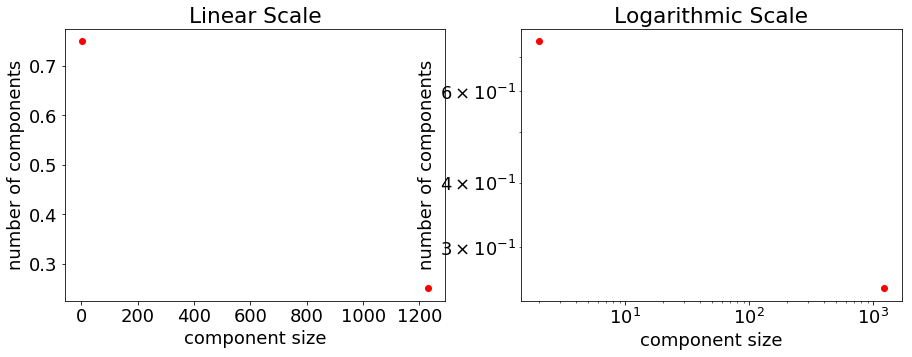

The largest weakly connected component in the network includes 1230 nodes


In [33]:
weak_component_lens = [len(c) for c in nx.weakly_connected_components(G2)]
weak_component_size_count = Counter(weak_component_lens)
plot_counter(weak_component_size_count,xlabel = "component size", ylabel = "number of components")
print("The largest weakly connected component in the network includes {} nodes"
      .format(max(weak_component_size_count.keys())))

!!!!Add comment

## Shortest paths

In [39]:
largest_strong_component = get_largest_strong_component(G2)
shortest_path_len_counts = Counter(get_sampled_shortest_path_lens(largest_strong_component))

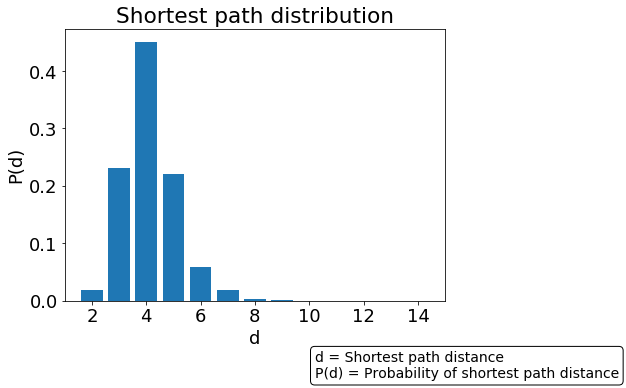

The longest sampled shortest path in the largest connected component of the network is 9 long.


In [40]:
hist_counter(shortest_path_len_counts,ylabel = "P(d)",xlabel = "d",has_legend = True
             ,xmeaning = ' Shortest path distance', ymeaning = ' Probability of shortest path distance',
            has_xlim = True, left = 1, right = 15)

print("The longest sampled shortest path in the largest connected component of the network is {} long."
      .format(max(shortest_path_len_counts.keys()))) 

## Network with weights
For weighted network we can take passengers number as weight or freight as a weight. Or combination of both
### 1. Passengers as weight

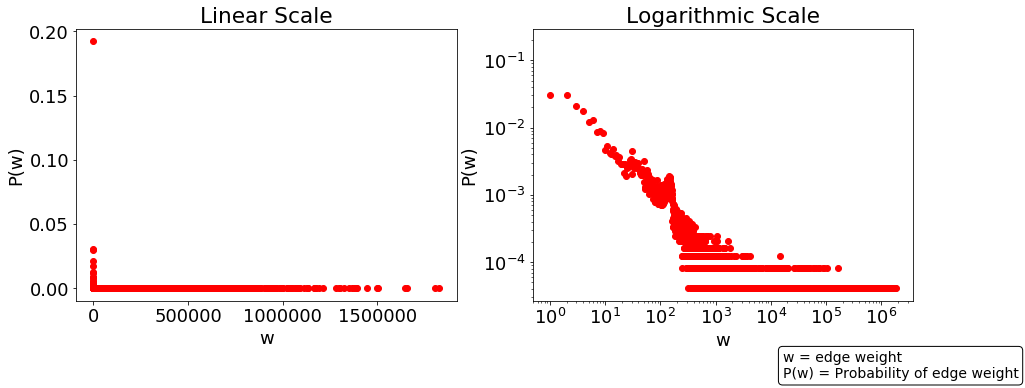

In [61]:
edge_weights = [d['PASSENGERS'] for u, v, d in G3.edges(data=True)]
weight_count = Counter(edge_weights)
plot_counter(weight_count,ylabel = "P(w)",xlabel = "w",has_legend = True,
             xmeaning = ' edge weight', ymeaning = ' Probability of edge weight')

### 2.FREIGHT as weight

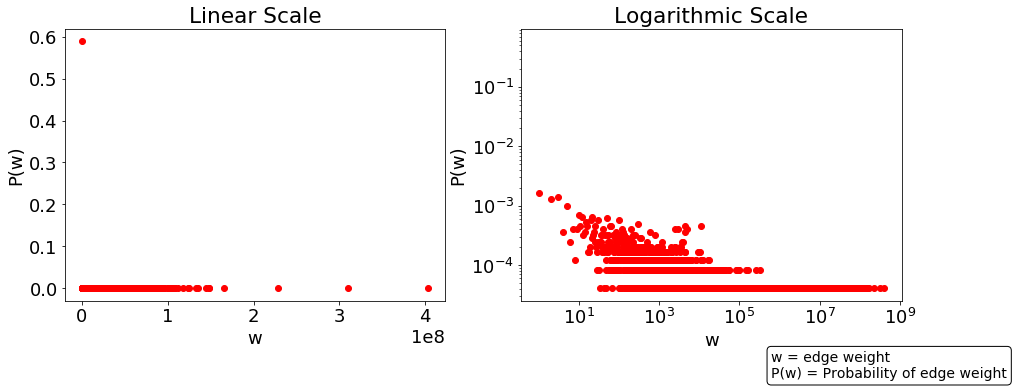

In [62]:
edge_weights = [d['FREIGHT'] for u, v, d in G4.edges(data=True)]
weight_count = Counter(edge_weights)
plot_counter(weight_count,ylabel = "P(w)",xlabel = "w",has_legend = True,
             xmeaning = ' edge weight', ymeaning = ' Probability of edge weight') 

## Shortest paths. Weight - passengers

In [65]:
for u,v,d in G3.edges(data=True):
    if d['PASSENGERS'] >0:
        d['distance'] = 1/d['PASSENGERS']

In [67]:
path_lengths = dict(nx.all_pairs_dijkstra_path_length(G3,weight = 'distance'))


In [68]:
shortest_path_lengths = []

for dictionary in path_lengths.values():

    for length in dictionary.values():

        shortest_path_lengths.append(length)
        


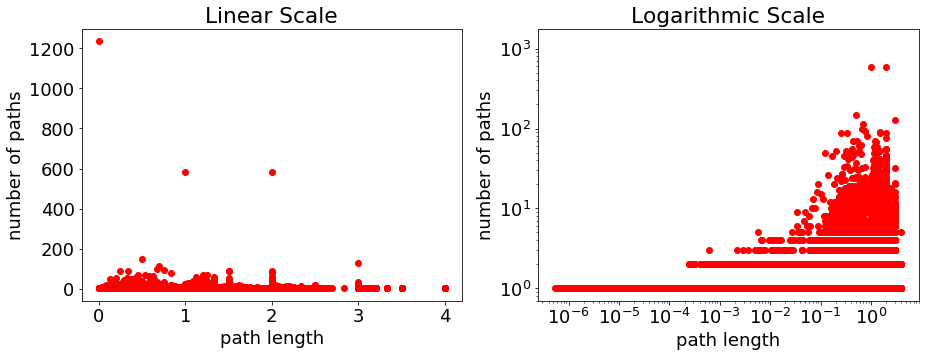

The diameter of the network is 4.000025494287298


In [69]:
shortest_path_len_counts = Counter(shortest_path_lengths)

plot_counter(shortest_path_len_counts,prob = False ,ylabel = "number of paths",xlabel = "path length")

print("The diameter of the network is {}".format(max(shortest_path_len_counts.keys())))

## Shortest paths. Weight - freight

In [72]:
for u,v,d in G4.edges(data=True):
    if d['FREIGHT'] >0:
        d['distance'] = 1/d['FREIGHT']

In [73]:
path_lengths = dict(nx.all_pairs_dijkstra_path_length(G4,weight = 'distance'))


In [74]:
shortest_path_lengths = []

for dictionary in path_lengths.values():

    for length in dictionary.values():

        shortest_path_lengths.append(length)
        


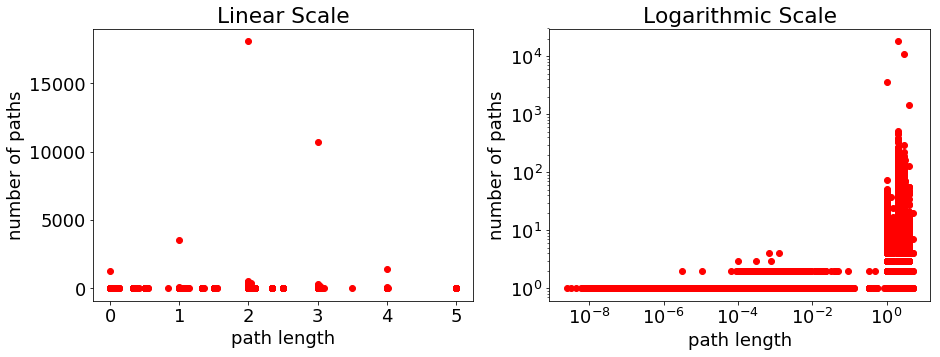

The diameter of the network is 5.000515790080911


In [75]:
shortest_path_len_counts = Counter(shortest_path_lengths)

plot_counter(shortest_path_len_counts,prob = False ,ylabel = "number of paths",xlabel = "path length")

print("The diameter of the network is {}".format(max(shortest_path_len_counts.keys())))

# US air traffic (2016) - Exercise 3